# Example on how to use the code

In [1]:
from bayesiancQED import *
import matplotlib.pyplot as plt
import time

### System and parameters

A qubit is coupled to a readout resonator with frequency `omega_r`, where the resonator response to the qubit state is `2*chi`. The resonator is driven with a coherent drive of amplitude `epsilon` and frequency `omega_d`, and its energy decay rate is `kappa`. The measurement has a quantum efficiency of `eta`, and the homodyne measurement pump is a large coherent field `alpha_p`. The qubit relaxation time is `T_1`, and its coherence time is `T_2`.

The _joiun qubit-resonator density matrix_ is described by `rho_00` and `rho_10` [see Eq. (95) of the paper]. The resonator intracavity state when qubit is in the ground (excited) state is a coherent state with amplitude `alpha_0` (`alpha_1`). The outgoing field is denoted with `alpha_0_out` and `alpha_1_out` for the qubit in ground and excited states respectively.

For full theoretical model and details, see [Phys. Rev. A **94**, 042326 (2016)](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.94.042326) ([arXiv:1606.07162](https://arxiv.org/abs/1606.07162))

**Note:** This code is written for a phase sensitive measurement, and when the output field is reflected from the resonator (and not transmitted).

--------------------

### Calculate the evolution of system for one trajectory

In [30]:
# Initial conditions
# Initial values are assigned as rho_init=[rho_00_initial, rho_10_initial] and alpha_init=[alpha_0_initial, alpha_1_initial]
rho_init = [1/2, 1j/2]; alpha_init = [0, 0];

# Parameters are in GHz, time unit is in ns
omega_r=2*np.pi*5; omega_d=2*np.pi*5; chi=2*np.pi*0.002; kappa=2*np.pi*0.001; epsilon=2*np.pi*0.001;
alpha_p=10; eta=1; T1=500; T2=500; dt=0.1; T=2000;

# Time evolution for one trajectory
tlist, rho_00_list, rho_10_list, alpha_0_list, alpha_1_list = evol(rho_init, alpha_init, omega_r, omega_d, chi, kappa, epsilon, alpha_p, eta, T1, T2, dt, T)

# Calculate the output field from the input field. This is for the reflected field configuration.
alpha_0_out_list, alpha_1_out_list = math.sqrt(kappa)*alpha_0_list + 1j*epsilon/math.sqrt(kappa), math.sqrt(kappa)*alpha_1_list + 1j*epsilon/math.sqrt(kappa)

### Plotting the results

Note that the break in evolution is due to a $T_1$ jump

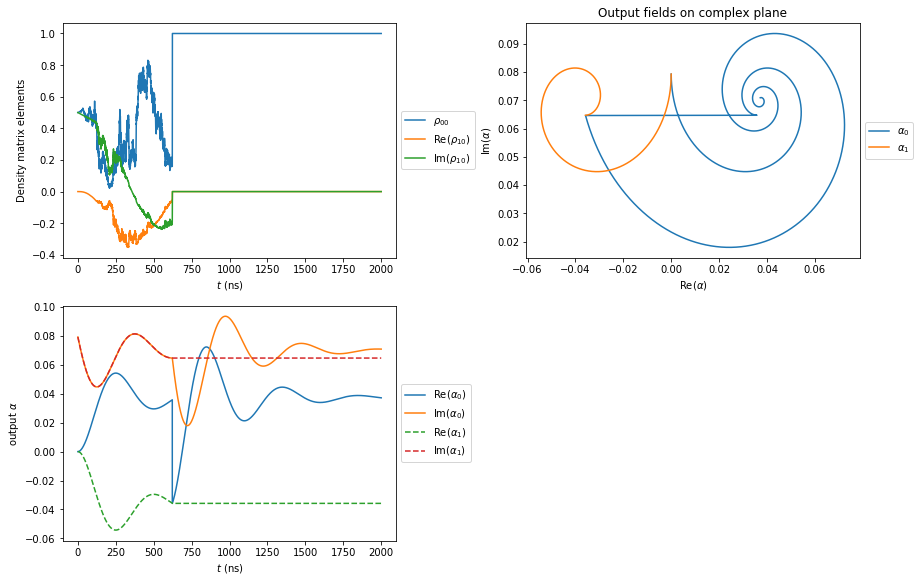

In [31]:
plt.clf();
fig = plt.figure(num=1)
fig.set_size_inches((12, 8))
ax1 = plt.subplot(221)

plt.plot(tlist, rho_00_list, label=r"$\rho_{00}$")
plt.plot(tlist, rho_10_list.real, label=r"$\mathrm{Re}(\rho_{10})$")
plt.plot(tlist, rho_10_list.imag, label=r"$\mathrm{Im}(\rho_{10})$")

plt.xlabel(r"$t$ (ns)"); plt.ylabel("Density matrix elements")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")

ax2 = plt.subplot(222)

plt.plot(alpha_0_out_list.real, alpha_0_out_list.imag, label=r"$\alpha_0$")
plt.plot(alpha_1_out_list.real, alpha_1_out_list.imag, label=r"$\alpha_1$")

plt.xlabel(r"$\mathrm{Re}(\alpha)$"); plt.ylabel(r"$\mathrm{Im}(\alpha)$"); plt.title("Output fields on complex plane")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")

ax3 = plt.subplot(223)

plt.plot(tlist, alpha_0_out_list.real, label=r"$\mathrm{Re}(\alpha_0)$")
plt.plot(tlist, alpha_0_out_list.imag, label=r"$\mathrm{Im}(\alpha_0)$")
plt.plot(tlist, alpha_1_out_list.real, "--", label=r"$\mathrm{Re}(\alpha_1)$")
plt.plot(tlist, alpha_1_out_list.imag, "--", label=r"$\mathrm{Im}(\alpha_1)$")

plt.xlabel(r"$t$ (ns)"); plt.ylabel(r"output $\alpha$")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")

plt.tight_layout(pad=0.4, w_pad=8, h_pad=1); 
plt.show();

In [32]:
t0 = time.time()

#initial conditions
rho_init = [1/2, 1j/2]; alpha_init = [0, 0];

# Parameters are in GHz, time unit is in ns
omega_r=2*np.pi*5; omega_d=2*np.pi*5; chi=2*np.pi*0.002; kappa=2*np.pi*0.001; epsilon=2*np.pi*0.001;
alpha_p=10; eta=1; T1=500; T2=500; dt=0.1; T=2000; trajs=1000;

# Calculate 'trajs' number of trajectories
# Output formatted as: [tlist, all_rho_00, all_rho_10, all_alpha_0, all_alpha_1]
out = parallelevol(rho_init, alpha_init, omega_r, omega_d, chi, kappa, epsilon, alpha_p, eta, T1, T2, dt, T, trajs)

# Density matrice elements averaged over all trajectories
tlist_mean, rho_00_list_mean, rho_10_list_mean = out[0], np.mean(out[1], axis=0), np.mean(out[2], axis=0)

print("Total evaluation time for {0:d} timesteps: {1:.1f} secs. ({2:d} steps/second)".format(int(trajs*T/dt), time.time()-t0, int(trajs*T/dt/(time.time()-t0))))

Total evaluation time for 20000000 timesteps: 162.1 secs. (123364 steps/second)


### Plot a subset of trajectories

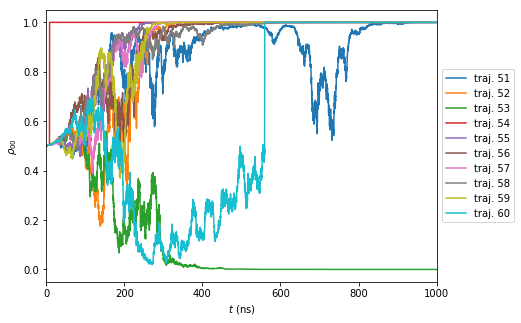

In [38]:
plt.clf();
fig = plt.figure(num=1)
fig.set_size_inches((7, 5))

for i in range(50,60):
    plt.plot(out[0], (out[1][i]), label="traj. {}".format(i+1))

plt.xlim(0, 1000);
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.xlabel(r"$t$ (ns)"); plt.ylabel(r"$\rho_{00}$")
plt.show()

### Plot mean of the trajectories

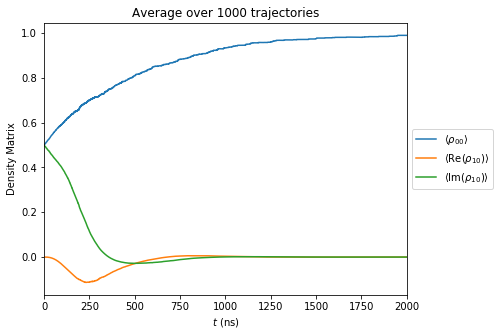

In [39]:
plt.clf();
fig = plt.figure(num=1)
fig.set_size_inches((6.5, 5))

plt.plot(tlist_mean, rho_00_list_mean, label=r"$\langle \rho_{00} \rangle$")
plt.plot(tlist_mean, rho_10_list_mean.real, label=r"$\langle \mathrm{Re}(\rho_{10}) \rangle$")
plt.plot(tlist_mean, rho_10_list_mean.imag, label=r"$\langle \mathrm{Im}(\rho_{10}) \rangle$")

plt.xlim(0, T); plt.xlabel(r"$t$ (ns)"); plt.ylabel("Density Matrix"); plt.title("Average over {0:d} trajectories".format(trajs))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")

plt.show()